In [10]:
import numpy as np
import gym
import navstack_gym
from gym import spaces
import matplotlib.pyplot as plt
from nav_sim_modules import MAP_OBS_VAL, MAP_PASS_VAL, MAP_UNK_VAL
from collections import deque

In [11]:
prior_count = 2
class Wrap(gym.ObservationWrapper):
    def __init__(self, env=None):
        super(Wrap, self).__init__(env)
        self.prior_count = prior_count
        self.prior_stack = deque(maxlen=self.prior_count)
        self.observation_space = spaces.Box(low=MAP_UNK_VAL, high=MAP_OBS_VAL, shape=(self.prior_count, env.map_size, env.map_size), dtype=np.float32)

    def observation(self, observation):
        if len(self.prior_stack) == self.prior_count:
            self.prior_stack.append(observation)
        else:
            self.prior_stack.extend([observation] * self.prior_count)
        return np.array(self.prior_stack)

    def reset(self, **kwargs):
        self.prior_stack.clear()
        return self.observation(self.env.reset(**kwargs))

In [12]:
env = gym.make('VisibleTreasureChestRoom-v0', path_turnable=np.pi/8, avoidance_size=3, move_limit=-1, path_planning_count=10, path_exploration_count=4000)
env = Wrap(env)

obs = env.reset(is_generate_pose=True)

In [13]:
obs.shape

(2, 256, 256)

In [14]:
obs, _, _, _ = env.step(env.action_space.sample())

In [15]:
obs.shape

(2, 256, 256)

In [16]:
obs1, obs2 = obs

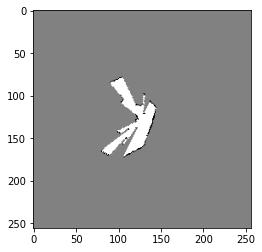

In [17]:
obs1[obs1==0] = 99
obs1[obs1==-1] = 50
obs1[obs1==100] = 0
plt.imshow(obs1, cmap='gray')

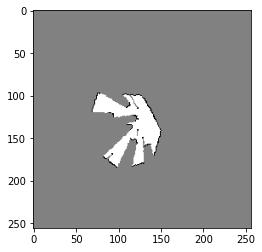

In [18]:
obs2[obs2==0] = 99
obs2[obs2==-1] = 50
obs2[obs2==100] = 0
plt.imshow(obs2, cmap='gray')